In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('cleaned_data.csv')
df.head(1)

,Price,Year,Kilometer,Engine,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Max Power_bhp,Max Power_rpm,Max Torque_Nm,Max Torque_rpm,Owner,Petrol,Manual,AWD,FWD,RWD
0,450000,2014,75000,1248,3995,1695,1555,5,42,74,4000,190,2000,2,0,1,0,1,0


In [44]:
for feature in df.columns.to_list():
    df[feature]= (df[feature] - df[feature].mean()) / df[feature].std()

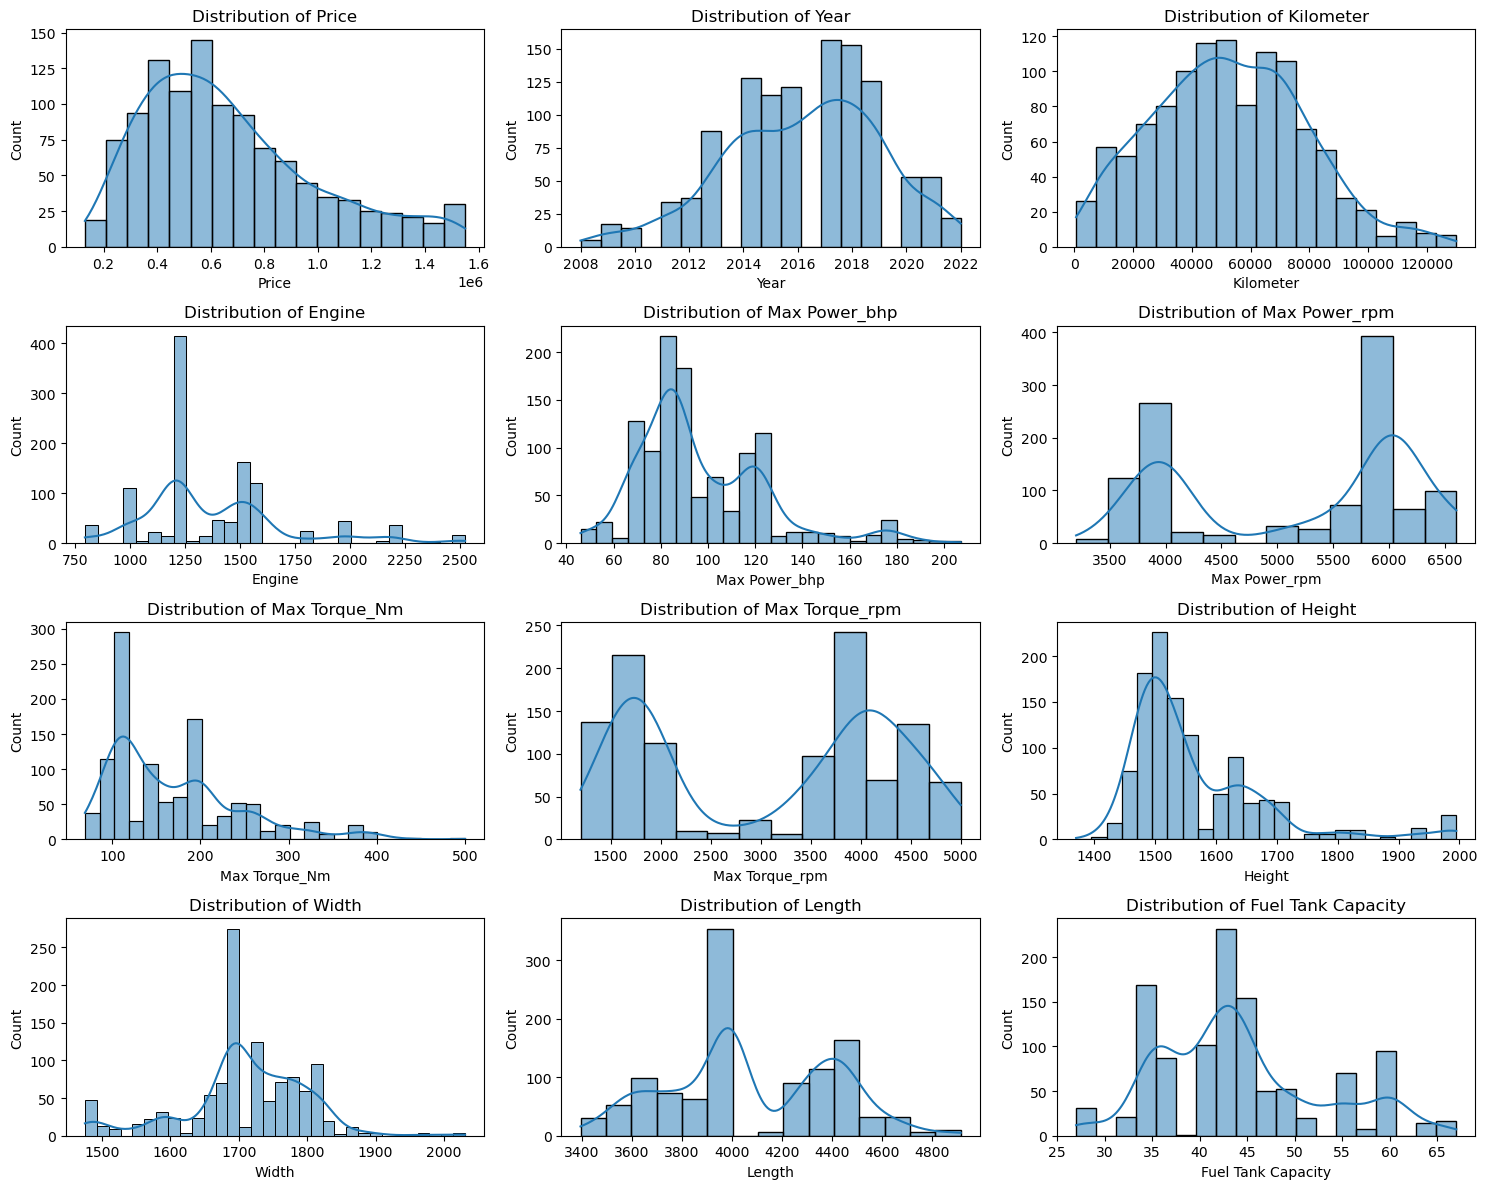

In [6]:


features = ['Price', 'Year', 'Kilometer', 'Engine', 'Max Power_bhp',
       'Max Power_rpm', 'Max Torque_Nm', 'Max Torque_rpm', 'Height','Width','Length' ,'Fuel Tank Capacity']

# Create a figure and a grid of subplots
num_features = len(features)
num_cols = 3  # Number of columns for the subplot grid
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate rows needed based on number of features and columns

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot distributions
for i, feature in enumerate(features):
    sns.histplot(df[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('feature_distributions.png')
plt.show()


In [36]:
features_2 = ['Seating Capacity',
 'Owner',
 'Petrol',
 'Manual',
 'AWD',
 'FWD',
 'RWD']

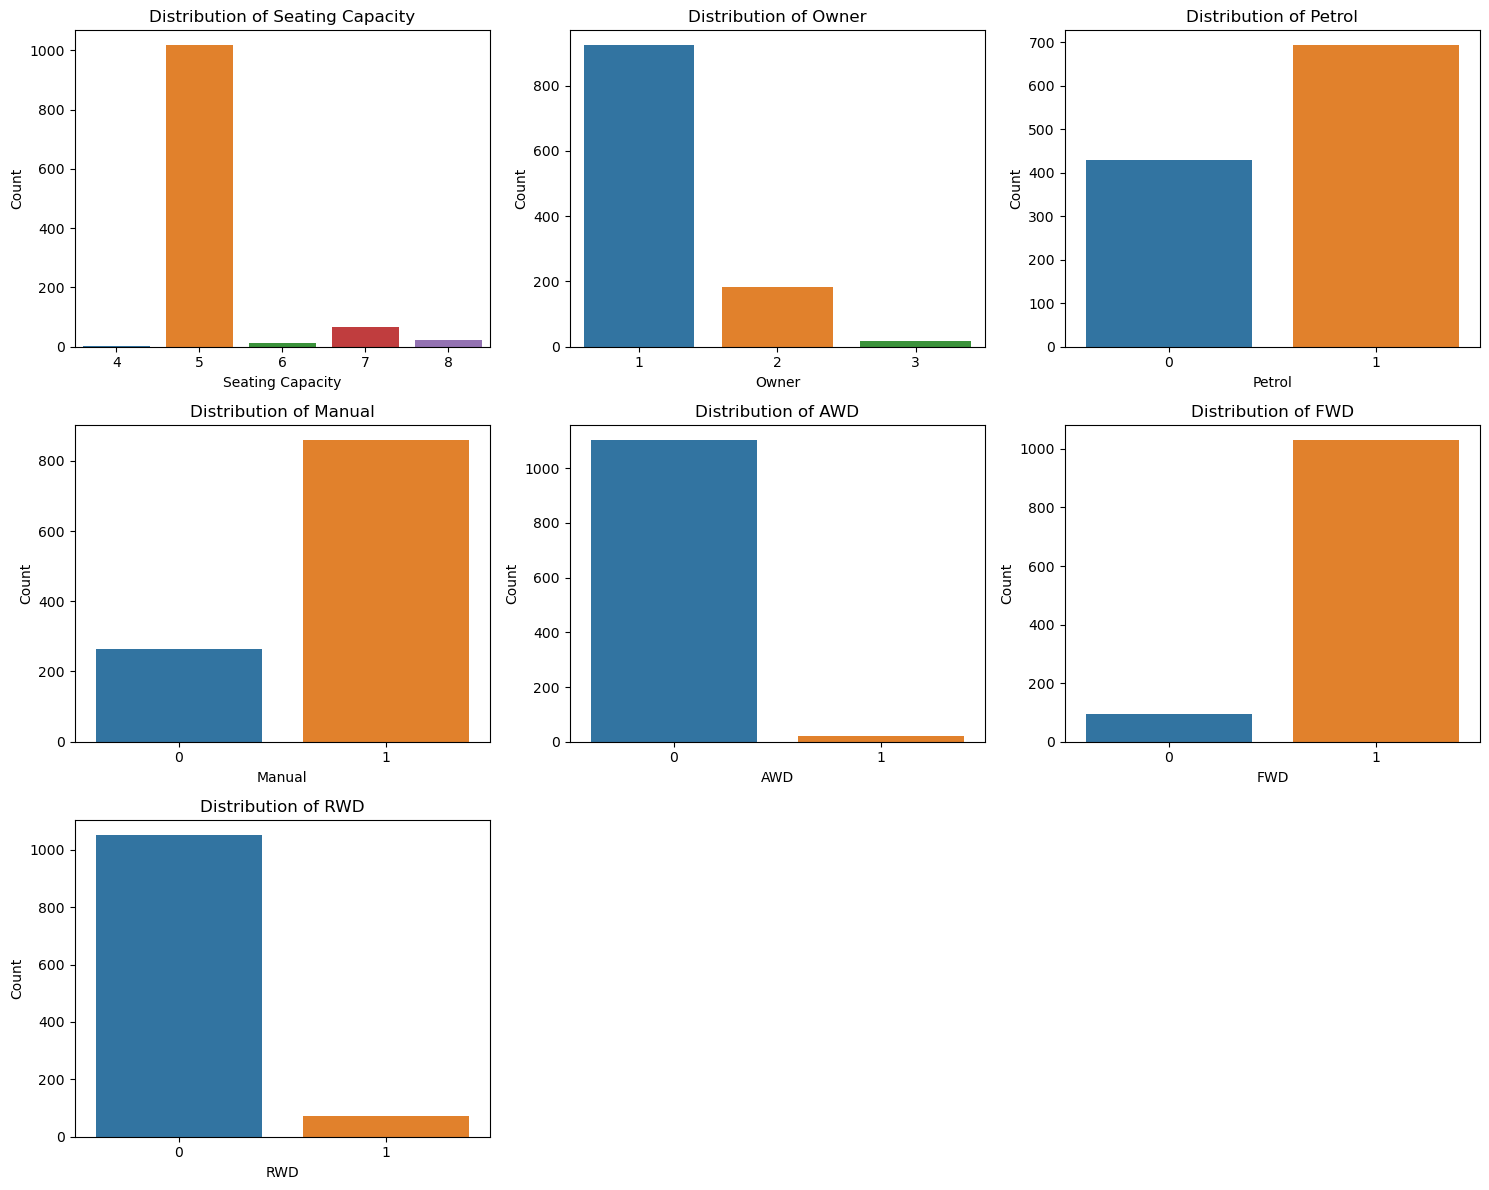

In [61]:


# Create a figure and a grid of subplots
num_features = len(features_2)
num_cols = 3  # Number of columns for the subplot grid
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate rows needed based on number of features and columns

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot distributions
for i, feature in enumerate(features_2):
    sns.(x=df[feature], ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('feature_counts.png')
plt.show()


In [8]:
columns_to_plot = df.columns.to_list()
columns_to_plot.remove('Price')
columns_to_plot

['Year',
 'Kilometer',
 'Engine',
 'Length',
 'Width',
 'Height',
 'Seating Capacity',
 'Fuel Tank Capacity',
 'Max Power_bhp',
 'Max Power_rpm',
 'Max Torque_Nm',
 'Max Torque_rpm',
 'Owner',
 'Petrol',
 'Manual',
 'AWD',
 'FWD',
 'RWD']

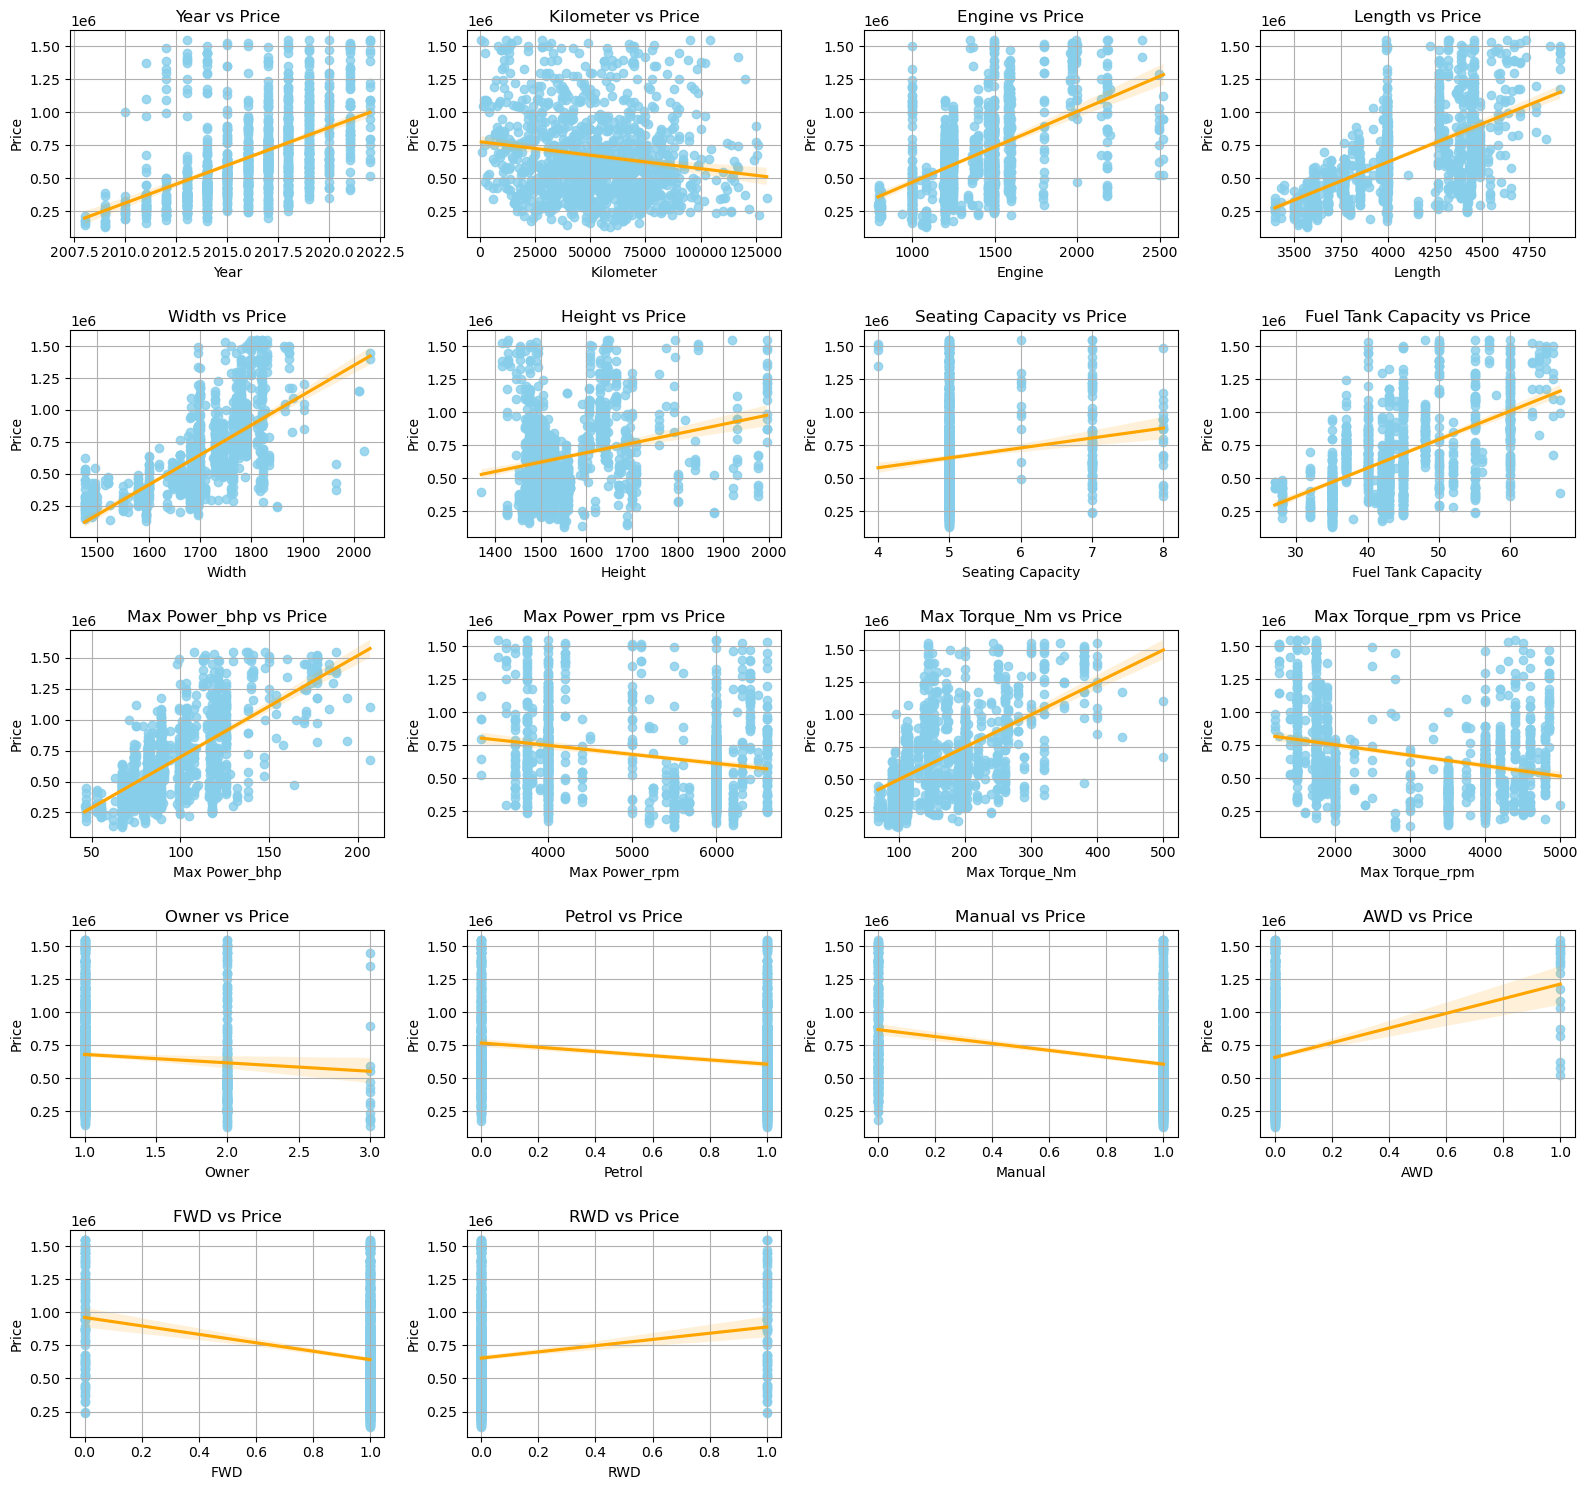

In [9]:
import math
num_vars = len(columns_to_plot)
num_cols = 4
num_rows = math.ceil(num_vars / num_cols)

# Set up the figure and axis
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, 3*num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()
# Scatter each variable against price using sns.regplot()
for i, col in enumerate(columns_to_plot):
    sns.regplot(x=col, y='Price', data=df, ax=axes[i], scatter_kws={"color": "skyblue"}, line_kws={"color": "orange"})
    axes[i].set_title(col + ' vs Price')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Price')
    axes[i].grid(True)

# Hide unused subplots
for j in range(num_vars, num_rows*num_cols):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure
plt.savefig('scatterplot_price.png')

# Show the plot
plt.show()

In [50]:
columns_cor=df.columns.to_list()

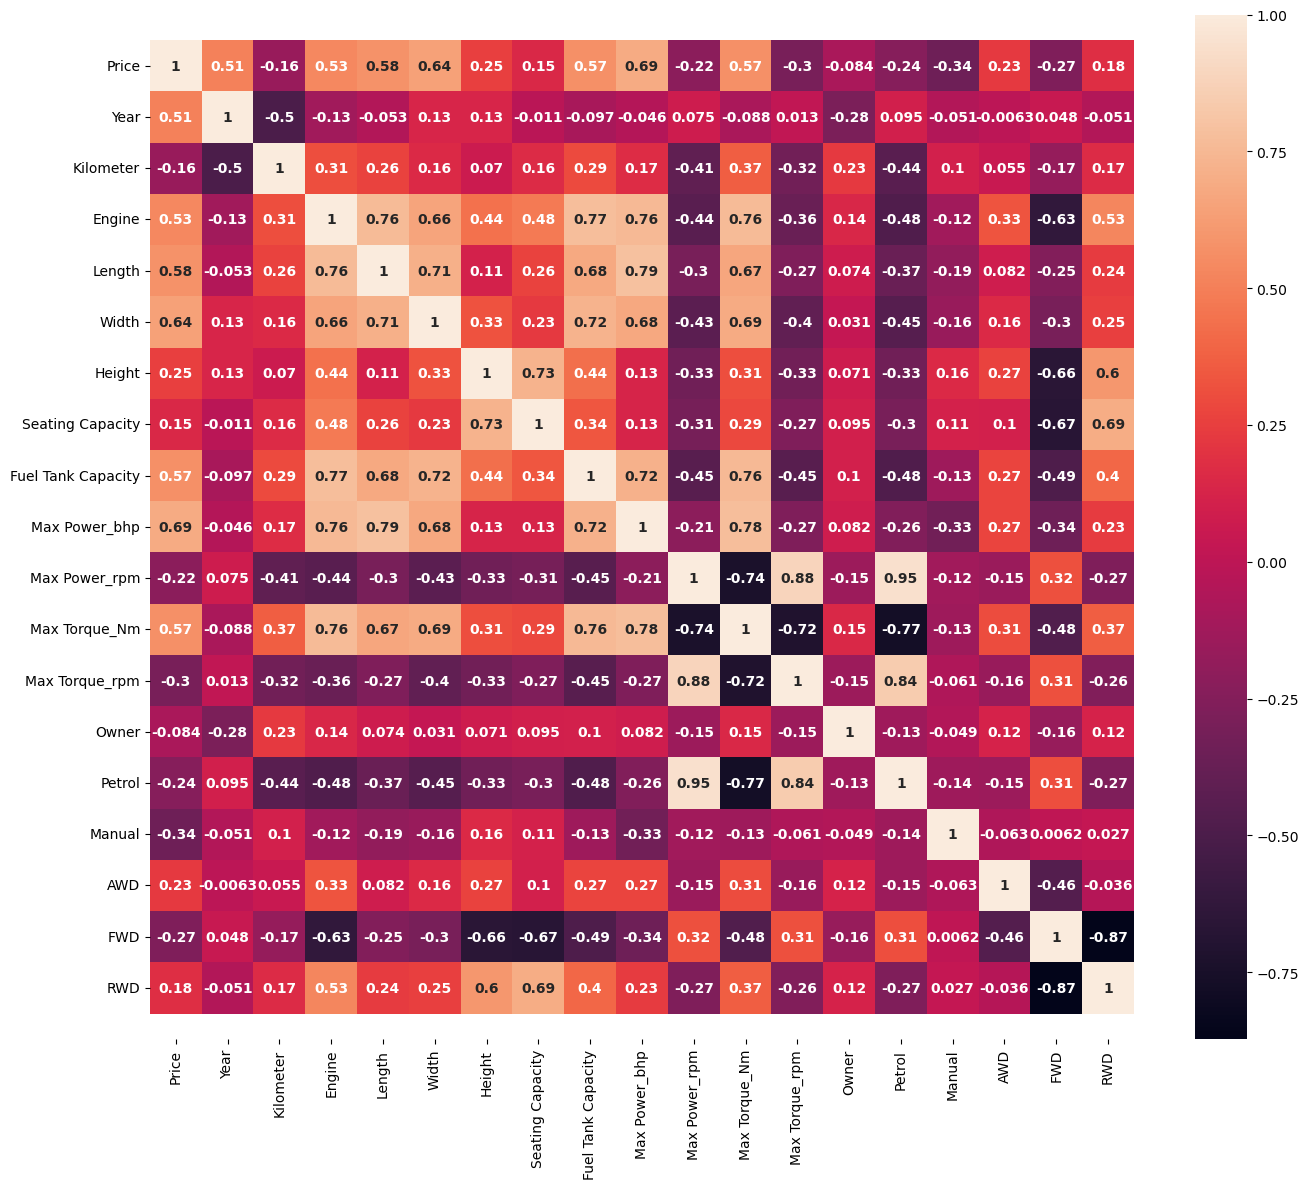

In [32]:
plt.figure(figsize=(14, 12))
cor = df.corr()
ax = sns.heatmap(cor,annot=True,annot_kws={"weight": "bold"})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.tight_layout()
plt.savefig('correlations_matrix.png')

plt.show()


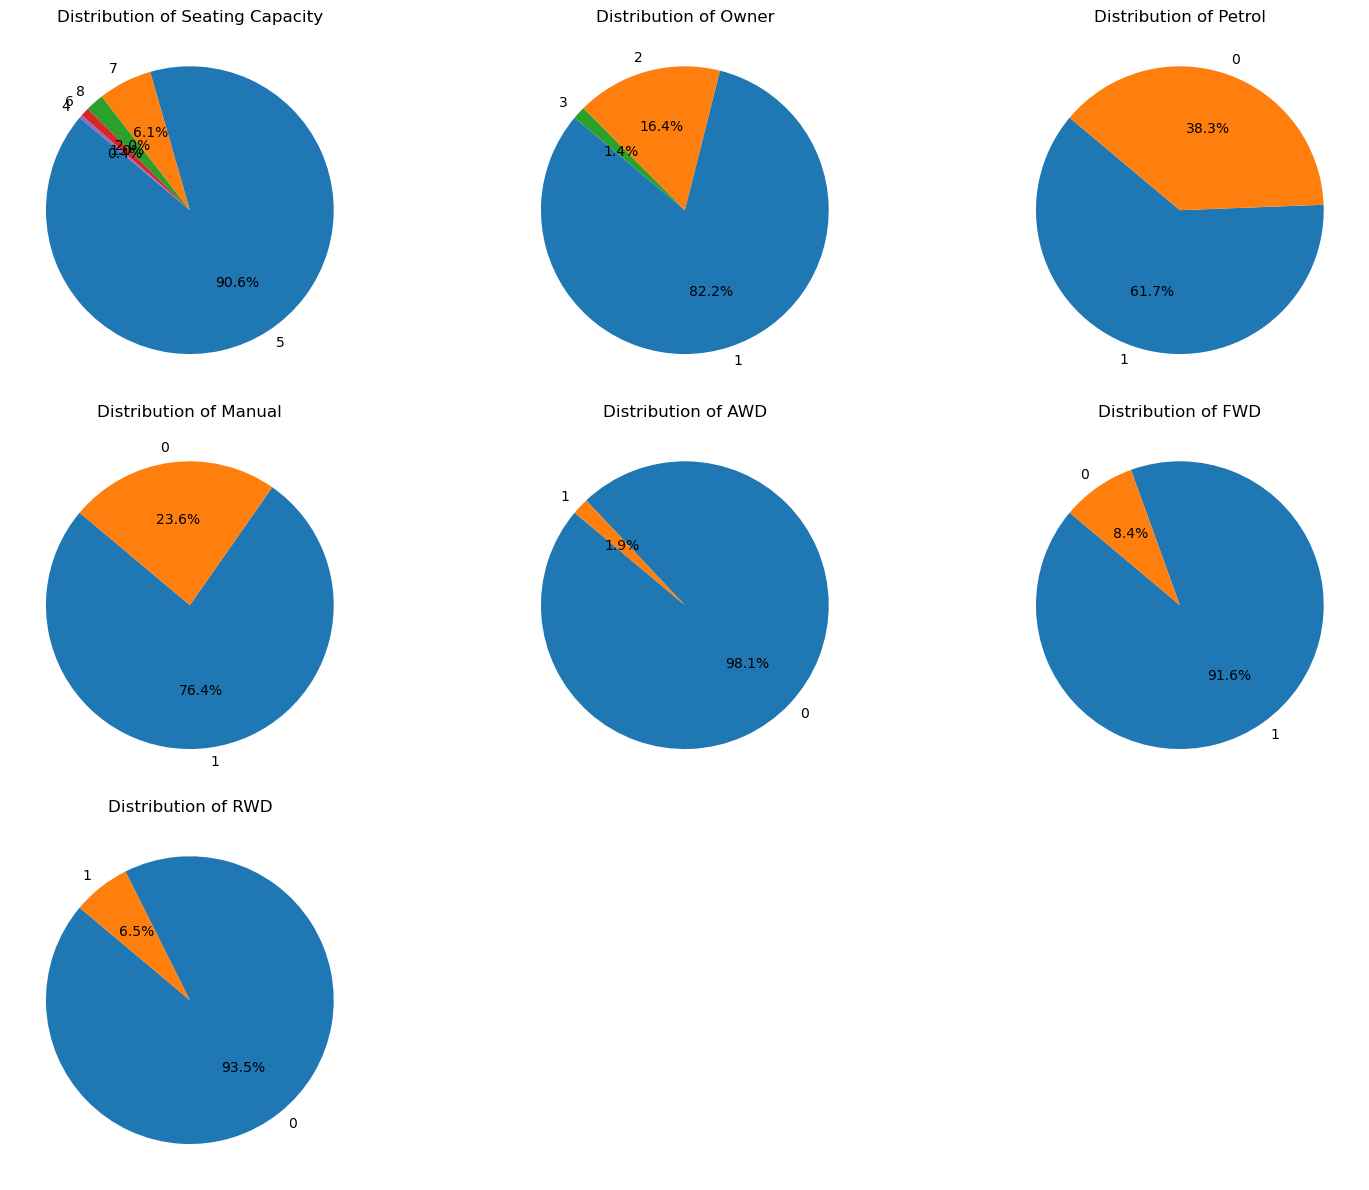

In [65]:
import matplotlib.pyplot as plt

# Create a figure and a grid of subplots
num_features = len(features_2)
num_cols = 3  # Number of columns for the subplot grid
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate rows needed based on number of features and columns

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot pie charts
for i, feature in enumerate(features_2):
    counts = df[feature].value_counts()  # Count the occurrences of each value
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)  # Plot a pie chart
    axes[i].set_title(f'Distribution of {feature}')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('feature_pie_charts.png')
plt.show()


In [16]:
df_new = df.copy()

In [17]:
import pandas as pd

def reverse_encoding(row):
    colors = ['AWD', 'RWD', 'FWD']
    for color in colors:
        if row[color] == 1:
            return color
    return None

# Apply reverse_encoding function to create a new column with original categorical values
df_new['Drivetrain'] = df_new.apply(reverse_encoding, axis=1)

# Drop the one-hot encoded columns
df_new.drop(columns=['AWD', 'FWD', 'RWD'], inplace=True)


In [18]:

def reverse_encoding(row):
    colors = ['Petrol']
    for color in colors:
        if row[color] == 1:
            return color
        if row[color] == 0:
            return 'Diesel'
    return None

# Apply reverse_encoding function to create a new column with original categorical values
df_new['Fuel Type'] = df_new.apply(reverse_encoding, axis=1)

# Drop the one-hot encoded columns
df_new.drop(columns=['Petrol'],inplace=True)


In [20]:
def reverse_encoding(row):
    colors = ['Manual']
    for color in colors:
        if row[color] == 1:
            return color
        if row[color] == 0:
            return 'Automatic'
    return None

# Apply reverse_encoding function to create a new column with original categorical values
df_new['Transmission'] = df_new.apply(reverse_encoding, axis=1)

# Drop the one-hot encoded columns
df_new.drop(columns=['Manual'],inplace=True)

In [21]:
df_new

,Price,Year,Kilometer,Engine,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Max Power_bhp,Max Power_rpm,Max Torque_Nm,Max Torque_rpm,Owner,Drivetrain,Fuel Type,Transmission
0,450000,2014,75000,1248,3995,1695,1555,5,42,74,4000,190,2000,2,FWD,Diesel,Manual
1,220000,2011,67000,1197,3585,1595,1550,5,35,79,6000,112,4000,1,FWD,Petrol,Manual
2,799000,2019,37500,1197,3995,1745,1510,5,37,82,6000,113,4200,1,FWD,Petrol,Manual
3,675000,2017,73315,1373,4490,1730,1485,5,43,91,6000,130,4000,1,FWD,Petrol,Manual
4,1390000,2017,56000,1798,4670,1814,1476,5,50,177,5100,250,1250,1,FWD,Petrol,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1118,891000,2016,47000,1591,4270,1780,1630,5,60,122,6400,154,4850,1,FWD,Petrol,Manual
1119,925000,2021,48000,1462,3995,1790,1640,5,48,103,6000,138,4400,1,FWD,Petrol,Manual
1120,245000,2014,79000,1197,3775,1680,1620,5,43,85,6000,113,4500,2,FWD,Petrol,Manual
1121,275000,2014,83000,814,3495,1550,1500,5,32,55,5500,75,4000,2,FWD,Petrol,Manual


In [13]:
features_new = ['Seating Capacity','Owner','Fuel Type', 'Drivetrain','Transmission']

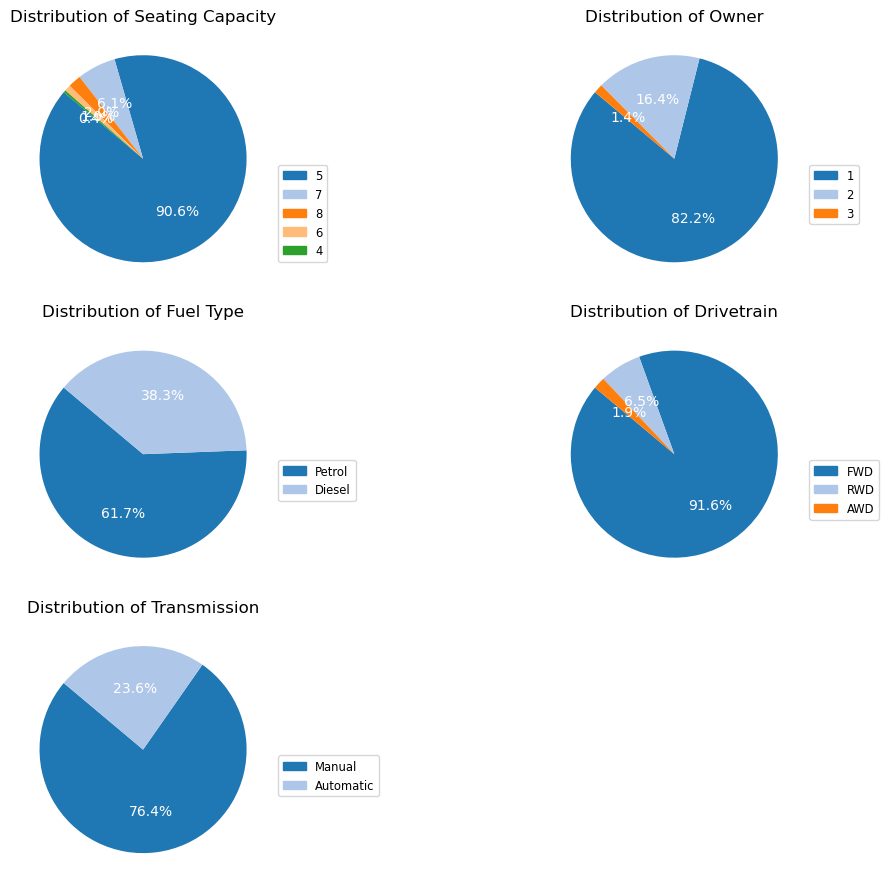

In [29]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

# Create a figure and a grid of subplots
num_features = len(features_new)
num_cols = 2  # Number of columns for the subplot grid
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate rows needed based on number of features and columns

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, num_rows * 3))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Define a colormap
colormap = plt.get_cmap("tab20")  # You can use any colormap you prefer

# Plot pie charts
for i, feature in enumerate(features_new):
    counts = df_new[feature].value_counts()  # Count the occurrences of each value
    colors = colormap(range(len(counts)))  # Get a list of colors from the colormap
    
    wedges, texts, autotexts = axes[i].pie(
        counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=colors
    )  # Plot a pie chart
    
    axes[i].set_title(f'Distribution of {feature}')
    
    # Create legend patches for the current pie chart
    legend_patches = [mpatches.Patch(color=color, label=label) for label, color in zip(counts.index, colors)]
    
    # Add the legend to the current axis
    axes[i].legend(handles=legend_patches, loc='best', bbox_to_anchor=(1, 0.5), fontsize='small')
    
    # Set the color of the labels and percentages to white for better readability
    for text in texts + autotexts:
        text.set_color('white')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and save the figure
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust rect to make space for the legends
plt.savefig('feature_pie_charts.png')
plt.show()
